<a href="https://colab.research.google.com/github/dardeshna/frc-stuffs/blob/master/linalg/intro_to_linalg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Linear Algebra

This notebook provides an introduction to the following linear algebra concepts:

* Vectors
* Matrices
* Matrix multiplication
* Matrix inverse and determinant
* Matrix equations

In [ ]:
# setup
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

## Vectors

A vector is a 1-dimensional ordered list of numbers. For a vector $\mathbf{x}$ with $n$ elements, we would say $\mathbf{x} \in \mathbb{R}^{n}$. This means $\mathbf{x}$ is a member of $\mathbb{R}^{n}$, and we define $\mathbb{R}^{n}$ to be the set of all vectors with $n$ elements.

For example, here is a column vector with $3$ elements:

\begin{gather*}
\mathbf{x}=\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
\end{gather*}

Similarly, here is a row vector with $3$ elements:

\begin{gather*}
\mathbf{y}=\begin{bmatrix} 4 & 5 & 6 \end{bmatrix}
\end{gather*}

We can convert between row and column vectors using the transpose operator:

\begin{gather*}
\mathbf{x}^T=\begin{bmatrix} 1 & 2 & 3 \end{bmatrix} \\
\mathbf{y}^T=\begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}
\end{gather*}

In linear algebra, vectors are typically written as column vectors. However, when we work with vectors in code they will always print as row vectors.


In [ ]:
x = np.array([1,2,3])
print(x)
print(x.T)

[1 2 3]
[1 2 3]


Note: We can technically construct column vectors as follows but the functions we will use can deduce row versus column based on context. To keep things simple we will always write vectors as row vectors in code.

In [ ]:
x = np.array([[1,2,3]]) # note the extra brackets
print(x)
print(x.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


### Indexing

The $i$-th element of a vector is generally denoted as $x_i$. Both equations and code will be zero-indexed to remain consistent. That means that in the example above, $x_0=1$, $x_1=2$ and $x_2=3$. **Note that the last element is $x_{n-1}$, not $x_n$.**

Indexing can be performed in Python using bracket notation `x[i]`.

In [ ]:
print(x[0])

[1 2 3]


### Summation

We denote the sum of the elements of $\mathbf{x} \in \mathbb{R}^{n}$ as follows:

\begin{gather*}
\sum_{i=0}^{n-1} x_i
\end{gather*}

This means we are summing elements $x_0, x_1, \ldots, x_{n-1} $.

Numpy provides an easy way to compute sums:

In [ ]:
print(x.sum())

6


### Addition

We can add vectors that have the same size. Addition is performed element-wise. For example we can define $\mathbf{x}$ and $\mathbf{y}$:

\begin{gather*}
\mathbf{x} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \quad
\mathbf{y} = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} \\
\end{gather*}

Then their sum is:

\begin{gather*}
\mathbf{x}+\mathbf{y} = \begin{bmatrix} 1+4 \\ 2+5 \\ 3+6 \end{bmatrix} =  \begin{bmatrix} 5 \\ 7 \\ 9 \end{bmatrix}
\end{gather*}

In [ ]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x+y)

[5 7 9]


### Dot product

We define the dot product $(\cdot)$ of $\mathbf{x}, \mathbf{y} \in \mathbb{R}^{n}$ to be the sum of the element-wise product of the vectors. Formally:

\begin{gather*}
\mathbf{x} \cdot \mathbf{y} = \sum_{i=0}^{n-1} x_i y_i
\end{gather*}

The dot product of vectors $\mathbf{x}$ and $\mathbf{y}$ from the previous section is:

\begin{gather*}
\mathbf{x} \cdot \mathbf{y} = (1 \cdot 4) + (2 \cdot 5) + (3 \cdot 6) = 32
\end{gather*}

In [ ]:
print(x.dot(y))

32


### Magnitude

The magnitude (euclidian norm) of a vector $\mathbf{x} \in \mathbb{R}^{n}$ is the square root of the sum of the squares of the elements:

\begin{gather*}
\| \mathbf{x} \|_2 = \sqrt{\sum_{i=0}^{n-1} x_i^2} = \sqrt{\mathbf{x} \cdot \mathbf{x}}
\end{gather*}


In [ ]:
print(np.linalg.norm(x))
print(np.sqrt(np.sum(x**2)))

3.7416573867739413
3.7416573867739413


## Matrices

A matrix is a 2-dimensional ordered list of numbers. For a matrix $\mathbf{A}$ with $m$ rows and $n$ columns, we would say $\mathbf{A} \in \mathbb{R}^{m \times n}$.

For example, here is a $3 \times 2$ matrix:

\begin{gather*}
\mathbf{A} = \begin{bmatrix} 5 & 2 \\ 3 & 1 \\ 8 & 6 \end{bmatrix}
\end{gather*}

This also means that an $m$-element column vector is an $m \times 1$ matrix. Similarly, an $n$-element row vector is a $1 \times n$ matrix.

We denote an element in row $i$ and column $j$ of matrix $\mathbf{A}$ as $(\mathbf{A})_{i,j}$ or $a_{i,j}$. Row $i$ can be denoted as either $(\mathbf{A})_{i,:}$ or $\mathbf{a}_i^T$. Note that the transpose operator indicates that this is a row vector (i.e. a column vector that has been transposed). Similarly, column $j$ can be denoted as either $(\mathbf{A})_{:,j}$ or $\mathbf{a}_j$.

In Python we can construct matrices using nested lists. We can also index into them using bracket notation `A[row, col]`.

In [ ]:
A = np.array([[5,2],[3,1],[8,6]])
print(A)
print(A[0,0])
print(A[1,0])

[[5 2]
 [3 1]
 [8 6]]
5
3


### Matrix transpose

Like vectors, we can transpose matrices. If $\mathbf{A} \in \mathbb{R}^{m \times n}$, then $\mathbf{A}^T \in \mathbb{R}^{n \times m}$ and $(\mathbf{A})_{i,j}= (\mathbf{A}^T)_{j,i}$. Using the previous example:

\begin{gather*}
\mathbf{A}^T = \begin{bmatrix} 5 & 3 & 8 \\ 2 & 1 & 6 \end{bmatrix}
\end{gather*}




### Scalar multiplication

Matrices can be multiplied by a scalar, which is applied element-wise. For example:

\begin{gather*}
2\mathbf{A} = \begin{bmatrix} 2(5) & 2(2) \\ 2(3) & 2(1) \\ 2(8) & 2(6) \end{bmatrix} = \begin{bmatrix} 10 & 4 \\ 6 & 2 \\ 16 & 12 \end{bmatrix}
\end{gather*}


In [ ]:
print(2*A)

[[10  4]
 [ 6  2]
 [16 12]]



### Addition

We can add matricies that have the same size. Addition is also performed element-wise. For example:

\begin{gather*}
\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \quad \mathbf{B} = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} \\
\mathbf{A} + \mathbf{B} = \begin{bmatrix} 6 & 8 \\ 10 & 12 \end{bmatrix}
\end{gather*}

In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(A+B)

[[ 6  8]
 [10 12]]


## Matrix Multiplication



### Compatible sizes

We can multiply two matrices provided their sizes are compatible. If $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{B} \in \mathbb{R}^{n \times d}$, then we can compute $\mathbf{AB} \in \mathbb{R}^{m \times d}$.

In other words, the number of columns in $\mathbf{A}$ and the number of rows in $\mathbf{B}$ must match. The resulting matrix will have the same number of rows as $\mathbf{A}$ and the same number of columns as $\mathbf{B}$.

An easy way to remember this is to write the dimensions of the matrix side-by-side. If the middle numbers are the same, then they cancel each other out and the product can be computed. For example:

\begin{gather*}
(3 \times 2) (2 \times 4) \rightarrow 3 \times 4
\end{gather*}


### Computing matrix products
To compute the elements of the matrix product, we take the dot product of the $i$-th row of $\mathbf{A}$ and the $j$-th column of $\mathbf{B}$. 

\begin{gather*}
(\mathbf{AB})_{i,j} = (\mathbf{A})_{i,:} \cdot (\mathbf{B})_{:,j} = \mathbf{a}_i^T \cdot \mathbf{b}_j
\end{gather*}

We can also write this using summation notation:

\begin{gather*}
(\mathbf{AB})_{i,j} = \sum_{k=0}^{m-1} a_{i,k} b_{k,j}
\end{gather*}

For example define $\mathbf{A} \in \mathbb{R}^{3 \times 2}$ and $\mathbf{B} \in \mathbb{R}^{2 \times 4}$:

\begin{gather*}
\mathbf{A} = \begin{bmatrix} 5 & 2 \\ 3 & 1 \\ 8 & 6 \end{bmatrix} \quad \mathbf{B} = \begin{bmatrix} 7 & 2 & 3 & 6 \\ 4 & 1 & 5 & 2 \end{bmatrix}
\end{gather*}

Then we can compute $\mathbf{AB} \in \mathbb{R}^{3 \times 4}$:

\begin{gather*}
\mathbf{AB} = \begin{bmatrix}
\mathbf{a}_0^T \cdot \mathbf{b}_0 & \mathbf{a}_0^T \cdot \mathbf{b}_1 & \mathbf{a}_0^T \cdot \mathbf{b}_2 & \mathbf{a}_0^T \cdot \mathbf{b}_3 \\
\mathbf{a}_1^T \cdot \mathbf{b}_0 & \mathbf{a}_1^T \cdot \mathbf{b}_1 & \mathbf{a}_1^T \cdot \mathbf{b}_2 & \mathbf{a}_1^T \cdot \mathbf{b}_3 \\
\mathbf{a}_2^T \cdot \mathbf{b}_0 & \mathbf{a}_2^T \cdot \mathbf{b}_1 & \mathbf{a}_2^T \cdot \mathbf{b}_2 & \mathbf{a}_2^T \cdot \mathbf{b}_3
\end{bmatrix} \\
= \begin{bmatrix}
5\cdot7+2\cdot4 & 5\cdot2+2\cdot1 & 5\cdot3+2\cdot5 & 5\cdot6+2\cdot2 \\
3\cdot7+1\cdot4 & 3\cdot2+1\cdot1 & 3\cdot3+1\cdot5 & 3\cdot6+1\cdot2 \\
8\cdot7+6\cdot4 & 8\cdot2+6\cdot1 & 8\cdot3+6\cdot5 & 8\cdot6+6\cdot2
\end{bmatrix} \\
= \begin{bmatrix}
43 & 12 & 25 & 34 \\
25 & 7 & 14 & 20 \\
80 & 22 & 54 & 60
\end{bmatrix}
\end{gather*}

In Python, matrix products can be computed with the `@` operator:

In [ ]:
A = np.array([[5,2],[3,1],[8,6]])
B = np.array([[7,2,3,6],[4,1,5,2]])
C = A@B
print(A)
print(A.shape)
print(B)
print(B.shape)
print(C)
print(C.shape)

[[5 2]
 [3 1]
 [8 6]]
(3, 2)
[[7 2 3 6]
 [4 1 5 2]]
(2, 4)
[[43 12 25 34]
 [25  7 14 20]
 [80 22 54 60]]
(3, 4)


### Dot product as matrix product

If we consider column vectors $\mathbf{x},\mathbf{y} \in \mathbb{R}^{n}$ as $n \times 1$ matrices, then we can rewrite the dot product using matrix multiplication:

\begin{gather*}
\mathbf{x} \cdot \mathbf{y} = \sum_{i=0}^{n-1} x_i y_i = \sum_{i=0}^{n-1} x_{i,0} y_{i,0} = \sum_{i=0}^{n-1} (\mathbf{x}^T)_{0,i} (\mathbf{y})_{i,0} = \mathbf{x}^T \mathbf{y}
\end{gather*}

$\mathbf{x}^T$ is a $1 \times n$ row vector, so the result of $\mathbf{x}^T \mathbf{y}$ is a $1 \times 1$ matrix which is just a scalar. This is nice because it is consistent with our notation of matrix rows and columns from earlier, and we can just drop the ($\cdot$) operator altogether.

In [ ]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x.dot(y))
print(x.T @ y)

32
32


### Matrix-vector products

Matrix-vector products are just a specific case of matrix multiplication. However, there is an alternative interpretation of matrix-vector products which is sometimes useful. To see this, we can write the matrix-vector product $\mathbf{Ax}$ as follows:

$\newcommand{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}}$
$\newcommand{\horzbar}{\rule[.5ex]{2.5ex}{0.5pt}}$
\begin{gather*}
\mathbf{Ax} = \left[
  \begin{array}{ccc}
    \horzbar & \mathbf{a}^{T}_{0} & \horzbar \\
    \horzbar & \mathbf{a}^{T}_{1} & \horzbar \\
             & \vdots    &          \\
    \horzbar & \mathbf{a}^{T}_{n} & \horzbar
  \end{array}
\right]
\left[
  \begin{array}{cccc}
    \vertbar \\
    \mathbf{x} \\
    \vertbar
  \end{array}
\right]
= \begin{bmatrix}
\mathbf{a}^{T}_{0}\mathbf{x} \\
\mathbf{a}^{T}_{1}\mathbf{x} \\
\vdots \\
\mathbf{a}^{T}_{n-1}\mathbf{x} \end{bmatrix}
\end{gather*}

If we expand out the dot products we can see the following:

\begin{gather*}
\begin{bmatrix}
a_{0,0}x_{0} + a_{0,1}x_{1} + \ldots + a_{0,n-1}x_{n-1} \\
a_{1,0}x_{0} + a_{1,1}x_{1} + \ldots + a_{1,n-1}x_{n-1} \\
\vdots \\
a_{n-1,0}x_{0} + a_{n-1,1}x_{1} + \ldots + a_{n-1,n-1}x_{n-1} \\
\end{bmatrix}
= x_0 \left[
  \begin{array}{cccc}
    \vertbar \\
    \mathbf{a}_0 \\
    \vertbar
  \end{array}
\right]
+ x_1 \left[
  \begin{array}{cccc}
    \vertbar \\
    \mathbf{a}_1 \\
    \vertbar
  \end{array}
\right]
+ \ldots + x_{n-1} \left[
  \begin{array}{cccc}
    \vertbar \\
    \mathbf{a}_{n-1} \\
    \vertbar
  \end{array}
\right]
\end{gather*} 

This means that $\mathbf{Ax}$ is a weighted sum of the columns of $\mathbf{A}$, where the weights are the entries of $\mathbf{x}$.

We can construct a similar result for the product $\mathbf{y}^T \mathbf{B}$:

\begin{gather*}
\mathbf{y}^T \mathbf{B}
= y_0 \left[
  \begin{array}{ccc}
    \horzbar & \mathbf{b}^{T}_{0} & \horzbar
  \end{array}
\right]
+ y_{1} \left[
  \begin{array}{ccc}
    \horzbar & \mathbf{b}^{T}_{1} & \horzbar
  \end{array}
\right]
+ \ldots + y_{n-1} \left[
  \begin{array}{ccc}
    \horzbar & \mathbf{b}^{T}_{n-1} & \horzbar
  \end{array}
\right]
\end{gather*}

In [ ]:
A = np.array([[5,2],[3,1],[8,6]])
x = np.array([2,1])
print(A@x)

y = np.zeros(3)
for j in range(A.shape[1]):
    y += x[j] * A[:,j] # multiply columns of A by corresponding element in x and sum
print(y)

[12  7 22]
[12.  7. 22.]


### Matrix products as stacked matrix-vector products

Finally, we build two additional interpretations of matrix multiplication. Let $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\mathbf{B} \in \mathbb{R}^{n \times d}$, and $\mathbf{AB} \in \mathbb{R}^{m \times d}$:

\begin{gather*}
\mathbf{AB} = \left[
  \begin{array}{cccc}
    \vertbar & \vertbar &        & \vertbar \\
    \mathbf{Ab}_0 & \mathbf{Ab}_1 & \ldots & \mathbf{Ab}_{d-1} \\
    \vertbar & \vertbar &        & \vertbar 
  \end{array}
\right]
= \left[
  \begin{array}{ccc}
    \horzbar & \mathbf{a}^{T}_{0}\mathbf{B} & \horzbar \\
    \horzbar & \mathbf{a}^{T}_{1}\mathbf{B} & \horzbar \\
             & \vdots    &          \\
    \horzbar & \mathbf{a}^{T}_{m-1}\mathbf{B} & \horzbar
  \end{array}
\right]
\end{gather*}

In other words, matrix multiplication is equivalent to stacking several matrix-vector products. In the first case, each column of $\mathbf{AB}$ is a different weighted sum of the columns of $\mathbf{A}$, with the weights given by $\mathbf{b}_j$. In the second case, each row of $\mathbf{AB}$ is a different weighed sum of the rows of $\mathbf{B}$, with the weights given by $\mathbf{a}^T_i$.

In [ ]:
A = np.array([[5,2],[3,1],[8,6]])
B = np.array([[7,2,3,6],[4,1,5,2]])
print(A@B)

C = np.zeros((A.shape[0], B.shape[1]))
for j in range(B.shape[1]):
    C[:,j] = A @ B[:,j] # column j of C equals A multiplied by column j of B
print(C)

[[43 12 25 34]
 [25  7 14 20]
 [80 22 54 60]]
[[43. 12. 25. 34.]
 [25.  7. 14. 20.]
 [80. 22. 54. 60.]]


## Square Matrices

### Identity matrix

The identity matrix $\mathbf{I}$ has ones on the diagonal of the matrix and zeros elsewhere. For example:

\begin{gather*}
\mathbf{I}_{3 \times 3} = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{gather*}

Any vector $\mathbf{x}$ or matrix $\mathbf{A}$ left-multiplied or right-multiplied by $\mathbf{I}$ is equal to itsef.


\begin{gather*}
\mathbf{I}\mathbf{x} = \mathbf{x} \\
\mathbf{x}^T \mathbf{I} = \mathbf{x}^T \\
\mathbf{A}\mathbf{I} = \mathbf{I}\mathbf{A} = \mathbf{A} \\
\end{gather*}


### Matrix inverse

Given a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$, we define $\mathbf{A}^{-1} \in \mathbb{R}^{n \times n}$ to be the inverse of $\mathbf{A}$ if:

\begin{gather*}
\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}
\end{gather*}

Note that an inverse only exists for square matrices otherwise the dimensions of $\mathbf{A}\mathbf{A}^{-1}$ and $\mathbf{A}^{-1}\mathbf{A}$ would not be the same.

We can calculate the inverse of a square matrix in Python as follows:

In [ ]:
A = np.random.random((3,3))
print(A)
print(np.linalg.inv(A))
print(A @ np.linalg.inv(A))

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]]
[[ 1.98960852  1.79913766 -2.4503547 ]
 [ 2.87590887 -3.14471165  0.30888212]
 [-3.56482088  2.09314855  1.86454351]]
[[ 1.00000000e+00  1.96961799e-16 -4.33955045e-18]
 [-9.49067715e-17  1.00000000e+00  9.86526551e-17]
 [-3.52864424e-16  2.55412709e-16  1.00000000e+00]]


Note: Observe how the off-diagonal entries in the matrix `A @ np.linalg.inv(A)` are not quite zero. This is due to roundoff errors that occur during the computation of the matrix inverse. These arise because a floating point number can only hold so many digits of precision. In most practical cases this does not matter, as `1e-16` is effectively zero.

**Some square matrices do not have an inverse and are called non-invertible, singular, or rank-deficient.** We can check for singular matrices by looking for matrix rank $r < n$.

In [ ]:
A = np.eye(3) # non-singular 
print(np.linalg.matrix_rank(A))
B = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]]) # singular
print(np.linalg.matrix_rank(B))

3
2


### Matrix determinant

The determinant of a square matrix is a scalar that encodes information about how it transforms other vectors and matrices. We can calculate the determinant of $\mathbf{A} \in \mathbb{R}^{2 \times 2}$ as follows:

\begin{gather*}
|\mathbf{A}| = \mathrm{det}(\mathbf{A}) = \begin{vmatrix} a_{0,0} & a_{0,1} \\ a_{1,0} & a_{1,1} \end{vmatrix} = a_{0,0}a_{1,1} - a_{1,0}a_{0,1}
\end{gather*}

For larger matrices the formula is more complicated but it is simple to compute in Python:

In [ ]:
A = np.random.random((5,5))
print(A)
print(np.linalg.det(A))

[[0.38344152 0.79172504 0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184  0.83261985 0.77815675]
 [0.87001215 0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892 0.52184832]
 [0.41466194 0.26455561 0.77423369 0.45615033 0.56843395]]
-0.08775630017504642


The determinant has a nice geometric interpretation:
>Consider the unit $n$-cube. The corners of this cube are all the points in $\mathbb{R}^n$ where each coordinate is either $0$ or $1$. The unit $n$-cube has an $n$-dimensional volume of $1$. If we transform the $n$-cube by the matrix $\mathbf{A}$, then the new volume is equal to $\mathrm{det}(\mathbf{A})$.

This can be understood more easily by focusing on $\mathbb{R}^2$. We can plot the corners of the unit 2-cube (a square) as follows:

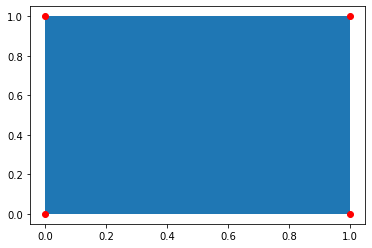

In [ ]:
# generate the corners by considering all points that have x[0] = 0 or 1 and x[1] = 0 or 1
corners = [
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
]

plt.fill(*zip(*corners)) # fill the shape

for c in corners:
    plt.plot(c[0], c[1], 'ro') # plot the corners

plt.show()

Now we pick a few different $2 \times 2$ matricies, print their determinants, and plot how they transform the unit square:

matrix:
[[2 0]
 [0 2]]
determinant: 4.0


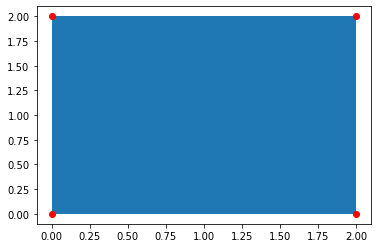

matrix:
[[0.6 0.4]
 [0.4 0.6]]
determinant: 0.19999999999999993


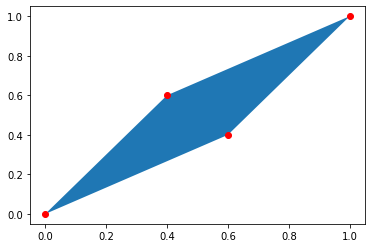

In [ ]:
A = np.array([[2, 0], [0, 2]])
B = np.array([[0.6, 0.4], [0.4, 0.6]])

for M in (A, B):

    print("matrix:")
    print(M)
    print("determinant:", np.linalg.det(M))

    transformed_corners = [M @ c for c in corners] # transform each corner

    plt.fill(*zip(*transformed_corners)) # fill the shape

    for c in transformed_corners:
        plt.plot(c[0], c[1], 'ro') # plot the corners
    
    plt.show()

In the first case it is clear that $\mathrm{det}(\mathbf{A})$ is the area of the scaled square. In the second case, we can see that the unit square has been squished, and the reduced area is reflected in the smaller determinant. If we compute the area of this parallelogram we would find it to be exactly $\mathrm{det}(\mathbf{B})$.

## Useful Matrix Identities

Copied from https://dustinstansbury.github.io/theclevermachine/linear-algebra-identities

### Basic Properties
\begin{eqnarray*}
\mathbf{A} + \mathbf{B} &=& \mathbf{B} + \mathbf{A} \\
\mathbf{A} + (\mathbf{B} + \mathbf{C}) &=& (\mathbf{A} + \mathbf{B}) + \mathbf{C} \\
\mathbf{A} (\mathbf{B} + \mathbf{C}) &=& (\mathbf{AB} + \mathbf{AC}) \\
a(\mathbf{B} + \mathbf{C}) &=& (a\mathbf{B} + a\mathbf{C}) = (\mathbf{B}a + \mathbf{C}a) \\
\mathbf{AB} &\neq& \mathbf{BA} \\
\mathbf{ABC} &=& (\mathbf{AB})\mathbf{C} = \mathbf{A}(\mathbf{BC}) \\
\end{eqnarray*}

### Transposes
\begin{eqnarray*}
(\mathbf{A}^T)^T &=& \mathbf{A} \\
(\mathbf{AB})^T &=& \mathbf{B}^{T}\mathbf{A}^{T} \\
(\mathbf{ABC})^T &=& \mathbf{C}^{T}\mathbf{B}^{T}\mathbf{A}^{T} \\
(\mathbf{A} + \mathbf{B})^T &=& (\mathbf{A}^T + \mathbf{B}^T) \\
\end{eqnarray*}

### Inverses and Identity

\begin{eqnarray*}
\mathbf{AI} &=& \mathbf{IA} = \mathbf{A} \\
\mathbf{AA}^{-1} &=& \mathbf{A}^{-1}\mathbf{A} = \mathbf{I} \\
(\mathbf{A}^{-1})^{-1} &=& \mathbf{A} \\
(\mathbf{AB})^{-1} &=& \mathbf{B}^{-1}\mathbf{A}^{-1}  \\
(\mathbf{ABC})^{-1} &=& \mathbf{C}^{-1}\mathbf{B}^{-1}\mathbf{A}^{-1} \\
(\mathbf{A}^T)^{-1} &=& (\mathbf{A}^{-1})^T \\
\end{eqnarray*}

### Determinants

\begin{eqnarray*}
\det(\mathbf{A}^T) &=& \det(\mathbf{A}) \\
\det(\mathbf{AB}) &=& \det(\mathbf{A})\det(\mathbf{B}) \\
\det(\mathbf{A}^{-1}) &=& \frac{1}{\det(\mathbf{A})} \\
\det(\mathbf{A}^n) &=& \det(\mathbf{A})^n \\
\det(c\mathbf{A}) &=& c^n \det(\mathbf{A}), \;\; \text{given }  \mathbf{A} \in \mathbb{R}^{n \times n} \\
\end{eqnarray*}

## Matrix Equations


Given a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ and vector $\mathbf{b} \in \mathbb{R}^{m}$, one might ask which vectors $\mathbf{x} \in \mathbb{R}^{n}$ satisfy the following equation:

\begin{gather*}
\mathbf{Ax} = \mathbf{b}
\end{gather*}

As we will see, the answer to this question depends on both the entries and shape of $\mathbf{A}$ and $\mathbf{b}$. We will look some of the most common cases below.

### Square matrix ($m=n$)

Let's assume that $\mathbf{A}$ is a square matrix, so $m=n$. We can expand out the matrix equation:

\begin{gather*}
\mathbf{Ax}
= \begin{bmatrix}
\mathbf{a}^{T}_{0}\mathbf{x} \\
\mathbf{a}^{T}_{1}\mathbf{x} \\
\vdots \\
\mathbf{a}^{T}_{n-1}\mathbf{x}
\end{bmatrix}
= \begin{bmatrix}
a_{0,0}x_{0} + a_{0,1}x_{1} + \ldots + a_{0,n-1}x_{n-1} \\
a_{1,0}x_{0} + a_{1,1}x_{1} + \ldots + a_{1,n-1}x_{n-1} \\
\vdots \\
a_{n-1,0}x_{0} + a_{n-1,1}x_{1} + \ldots + a_{n-1,n-1}x_{n-1} \\
\end{bmatrix}
= \begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_{n-1} \end{bmatrix}
\end{gather*}

This is nothing more than a system of linear equations with variables $x_0, x_1, \ldots, x_{n-1} $.

\begin{gather*}
a_{0,0}x_{0} + a_{0,1}x_{1} + \ldots + a_{0,n-1}x_{n-1} = b_0 \\
a_{1,0}x_{0} + a_{1,1}x_{1} + \ldots + a_{1,n-1}x_{n-1} = b_1 \\
\vdots \\
a_{n-1,0}x_{0} + a_{n-1,1}x_{1} + \ldots + a_{n-1,n-1}x_{n-1} = b_{n-1}
\end{gather*}

Since $\mathbf{A}$ is a square matrix, we have $n$ equations and $n$ unknowns. This means that the system of equations can generally be solved. We will skip the cases where $\mathbf{A}$ is singular, as this corresponds to all the systems that have either no solution or infinite solutions.

To solve the matrix equation, we can left-multiply both sides of the equation by $\mathbf{A}^{-1}$.

\begin{align*}
\mathbf{Ax} &= \mathbf{b} \\
\mathbf{A}^{-1} \mathbf{Ax} &= \mathbf{A}^{-1}\mathbf{b} \\
\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}
\end{align*}

While this is mathematically correct, it can be expensive to compute $\mathbf{A}^{-1}$. Furthermore, as we saw earlier, multiplying by $\mathbf{A}^{-1}$ can suffer from roundoff errors. Python offers a function `np.linalg.solve(A, b)` which is faster and more stable.

In [ ]:
# x + y + z = 2
# 3x - 2y + 4z = 1
# -2x + 4y - z = 3

A = np.array([
    [1, 1, 1],
    [3, -2, 4],
    [-2, 4, -1]
])

b = np.array([2, 1, 3])

x = np.linalg.solve(A, b)

print("x=solve(A,b):", x)
print("x=A^(-1)@b:", np.linalg.inv(A) @ b)

print("A@x:", A @ x)
print("b:", b)

x=solve(A,b): [0.45454545 1.09090909 0.45454545]
x=A^(-1)@b: [0.45454545 1.09090909 0.45454545]
A@x: [2. 1. 3.]
b: [2 1 3]


### Tall matrix ($m > n$)

If $\mathbf{A}$ is a tall matrix, then we have $m$ equations and $n$ unknowns, so we have $m-n$ extra equations. This means that the system generally won't have a solution.

\begin{gather*}
\mathbf{Ax}
= \begin{bmatrix}
a_{0,0}x_{0} + a_{0,1}x_{1} + \ldots + a_{0,n-1}x_{n-1} \\
a_{1,0}x_{0} + a_{1,1}x_{1} + \ldots + a_{1,n-1}x_{n-1} \\
\vdots \\
a_{m-1,0}x_{0} + a_{m-1,1}x_{1} + \ldots + a_{m-1,n-1}x_{n-1} \\
\end{bmatrix}
= \begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_{m-1} \end{bmatrix}
\end{gather*}

Instead, we can look for the vector $\mathbf{x} \in \mathbb{R}^{n}$ such that $\mathbf{Ax} \in \mathbb{R}^{m}$ is closest to $\mathbf{b} \in \mathbb{R}^{m}$. One way to define closeness is the magnitude of the error $\| \mathbf{Ax} - \mathbf{b} \|$. The value of $\mathbf{x}$ that minimizes this quantity is called the least-squares solution.

Python has a function `np.linalg.lstsq(A, b)` to compute the least-squares solution to a tall system:

In [ ]:
# x + y + z = 2
# 3x - 2y + 4z = 1
# -2x + 4y - z = 3
# 2x + y + 2z = 4

A = np.array([
    [1, 1, 1],
    [3, -2, 4],
    [-2, 4, -1],
    [2, 1, 2]
])

b = np.array([2, 1, 3, 4])

# numpy complains if we don't pass rcond=None
# np.linalg.lstsq returns a tuple where the vector x is the first element
x = np.linalg.lstsq(A, b, rcond=None)[0]

print("x:", x)

print("A@x:", A @ x)
print("b:", b)

print("A@x-b:", A @ x - b)
print("||A@x-b||:", np.linalg.norm(A @ x - b))

x: [1.08737864 1.31067961 0.09708738]
A@x: [2.49514563 1.02912621 2.97087379 3.67961165]
b: [2 1 3 4]
A@x-b: [ 0.49514563  0.02912621 -0.02912621 -0.32038835]
||A@x-b||: 0.5911975668985757


### Wide matrix ($m < n$)

If $\mathbf{A}$ is a wide matrix, then we have $n-m$ extra unknowns. This means that the system will generally have infinite solutions. In this case we can look for the solution $\mathbf{x}$ with the smallest magnitude $\| \mathbf{x} \|$.

Note: This is also referred to as the least-squares solution which can cause confusion. It depends on the context of whether $\mathbf{A}$ is tall or wide.

In Python we use the same function `np.linalg.lstsq(A, b)`:

In [ ]:
# x + y + z = 2
# 3x - 2y + 4z = 1

A = np.array([
    [1, 1, 1],
    [3, -2, 4]
])

b = np.array([2, 1])

# numpy complains if we don't pass rcond=None
# np.linalg.lstsq returns a tuple where the vector x is the first element
x = np.linalg.lstsq(A, b, rcond=None)[0]

print("x:", x)
print("||x||:", np.linalg.norm(x))
print("A@x:", A @ x)
print("b:", b)

# -6 + 1 + 5 = 0
# 3(-6) - 2(1) + 4(5) = 0
# so y = x + [-6, 1, 5] is also a solution
y = x + np.array([-6, 1, 5])

print()
print("y:", y)
print("||y||:", np.linalg.norm(y))
print("A@y:", A @ y)
print("b:", b)

x: [0.51612903 1.08064516 0.40322581]
||x||: 1.2636353087613494
A@x: [2. 1.]
b: [2 1]

y: [-5.48387097  2.08064516  5.40322581]
||y||: 7.974758566473871
A@y: [2. 1.]
b: [2 1]
